<a href="https://colab.research.google.com/github/Cinnameldehyde/Skin-Disease-Prediction/blob/main/Skin_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8 CLASSES DATASET NOT COMBINED AUGMENTED 6.3K IMAGES

Downloading the dataset

In [2]:
!kaggle datasets download -d subirbiswas19/skin-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset
License(s): CC0-1.0
 98% 17.0M/17.3M [00:01<00:00, 19.4MB/s]
100% 17.3M/17.3M [00:01<00:00, 14.7MB/s]


In [3]:
from zipfile import ZipFile

with ZipFile("skin-disease-dataset.zip", "r") as zip_ref:
  zip_ref.extractall()

Checking no of images

In [4]:
import os
train_dir  ="/content/skin-disease-datasaet/train_set"
total_train_images  =0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    total_train_images += num_images

print("Total no of training images: ", total_train_images)

Total no of training images:  925


In [5]:
test_dir = "/content/skin-disease-datasaet/test_set"
total_test_images  =0

for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir , category)
  num_images = len(os.listdir(category_dir))
  total_test_images += num_images

print("Total no of test images: ", total_test_images)

Total no of test images:  234


Seeing some sample images

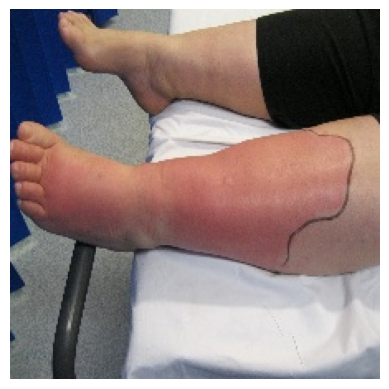

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = "/content/skin-disease-datasaet/train_set/BA- cellulitis/BA- cellulitis (1).jpeg"
img = mpimg.imread(img_dir)
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
print(img.shape)

(224, 224, 3)


In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

# Paths
input_dir = '/content/skin-disease-datasaet/train_set'  # Replace with your input folder containing subfolders for each class
output_dir = '/content/skin-disease-datasaet/train_set_1'  # Replace with your desired output folder

# Create output directory if not exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,        # Rotate images up to 30 degrees
    width_shift_range=0.2,    # Horizontal shift
    height_shift_range=0.2,   # Vertical shift
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Flip horizontally
    fill_mode="nearest"       # Fill gaps after transformations
)

# Iterate through class subfolders
for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        # Create the corresponding class subfolder in the output directory
        output_class_path = os.path.join(output_dir, class_name)
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)

        # Process each image in the class folder
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # Copy the original image to the output directory
            img = load_img(img_path)  # Load the image
            img.save(os.path.join(output_class_path, img_name))  # Save original image

            # Prepare for augmentation
            x = img_to_array(img)  # Convert to array
            x = x.reshape((1,) + x.shape)  # Reshape for the generator

            # Generate 6 augmented images for each input image
            count = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=output_class_path,
                                       save_prefix='aug', save_format='jpeg'):
                count += 1
                if count >= 6:  # Stop after generating 6 images
                    break

print("Dataset creation complete. Combined images are saved in:", output_dir)


Dataset creation complete. Combined images are saved in: /content/skin-disease-datasaet/train_set_1


In [9]:
train_dir = "/content/skin-disease-datasaet/train_set_1"
test_dir = "/content/skin-disease-datasaet/test_set"
total_train_images  =0
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)


Found 6278 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


In [14]:
#DEFINING THE DATA GENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale = 1./255,
)
#Defining the training set data generator

train_dir  ="/content/skin-disease-datasaet/train_set"

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size =(150, 150),
    class_mode="categorical",
    batch_size = 32
)
 #Defining the test set generator

test_dir = "/content/skin-disease-datasaet/test_set"

test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode="categorical",
    batch_size = 32
)


Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))



model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(128, activation ="relu"))
model.add(Dropout(0.6))
model.add(Dense(8, activation="softmax"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 9, 9, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 9, 9, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,312,264 (16.45 MB)

 Trainable params: 4,309,512 (16.44 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [18]:
from keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])
history  = model.fit(train_generator, epochs = 25, batch_size = 15, validation_data = test_generator)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.1504 - loss: 5.0957 - val_accuracy: 0.0987 - val_loss: 2.1612
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.2031 - loss: 3.0684 - val_accuracy: 0.1416 - val_loss: 2.1447
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.2446 - loss: 2.3940 - val_accuracy: 0.0987 - val_loss: 2.7085
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.2618 - loss: 2.1875 - val_accuracy: 0.0987 - val_loss: 2.1732
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.3065 - loss: 2.0885 - val_accuracy: 0.1459 - val_loss: 2.0876
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.3339 - loss: 1.9055 - val_accuracy: 0.2017 - val_loss: 2.0767
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.3408 - loss: 1.7717 - val_accuracy: 0.1416 - val_loss: 2.3166
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.3637 - loss: 1.7788 - val_accuracy: 0.1416 - val_loss: 2.

In [12]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Build the Model
# model = Sequential()

# # First Convolutional Block
# model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3), padding="same"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

# # Second Convolutional Block
# model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

# # Third Convolutional Block
# model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

# # Fourth Convolutional Block
# model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

# # Flatten and Fully Connected Layers
# model.add(Flatten())
# model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.4))  # Dropout to prevent overfitting
# model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.4))  # Dropout to prevent overfitting
# model.add(Dense(8, activation="softmax"))

# # Summary
# model.summary()

# # Compile the Model
# model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       5,308,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,732,936 (21.87 MB)

 Trainable params: 5,731,976 (21.87 MB)

 Non-trainable params: 960 (3.75 KB)

In [10]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Extract labels from the training generator
# train_labels = train_generator.classes  # Assuming train_generator is your data generator

# # Compute class weights
# class_weights = compute_class_weight(
#     class_weight="balanced",
#     classes=np.unique(train_labels),
#     y=train_labels
# )

# # Convert to dictionary
# class_weights = dict(enumerate(class_weights))
# print("Class Weights:", class_weights)

# # Train the Model with computed class weights
# history = model.fit(
#     train_generator,
#     epochs=25,
#     validation_data=validation_generator,
#     class_weight=class_weights,  # Pass the dictionary of class weights
#     callbacks=[early_stopping, checkpoint, reduce_lr]
# )


Class Weights: {0: 0.8520629750271445, 1: 1.4268181818181818, 2: 0.9386961722488039, 3: 0.9030494821634062, 4: 1.2760162601626017, 5: 1.1472953216374269, 6: 0.8492965367965368, 7: 0.8927758816837316}


NameError: name 'model' is not defined



---



In [19]:
model.save("skin_disease_model_16nov.h5")

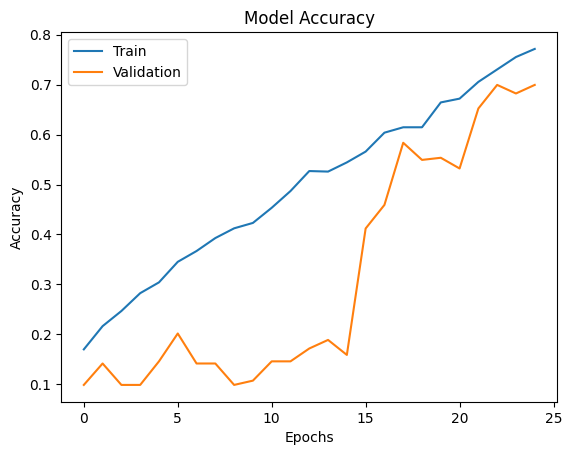

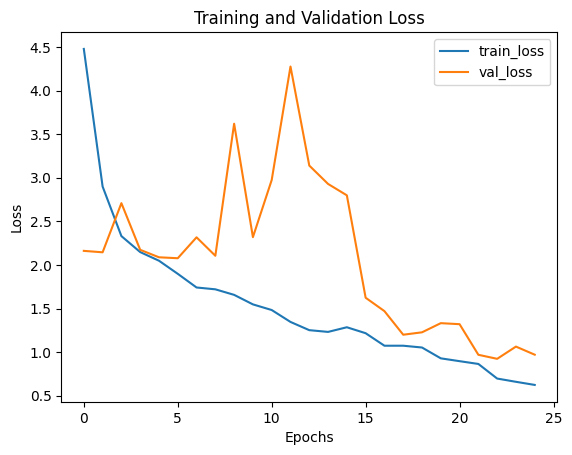

In [20]:
h = history

plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


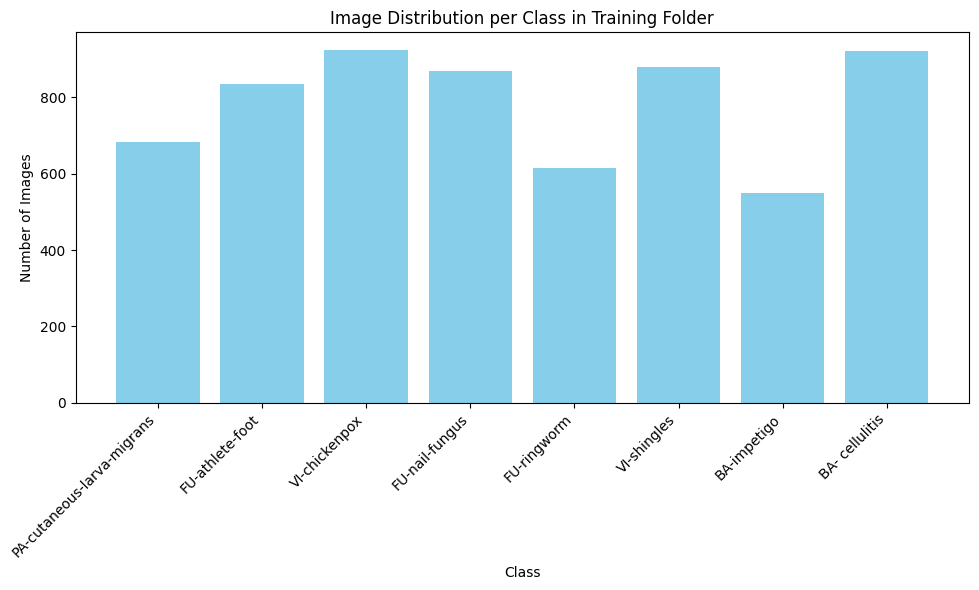

In [21]:
import os
import matplotlib.pyplot as plt

# Define the path to the training folder
train_folder = '/content/skin-disease-datasaet/train_set_1'

# Dictionary to hold the class names and their image counts
class_counts = {}

# Loop through each subfolder (class) in the training folder
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):  # Check if it's a folder
        # Count the number of images in each class folder
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

# Plotting the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Image Distribution per Class in Training Folder')
plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Step 1: Generate predictions
# Assuming test_generator is already defined and used during training
test_generator.reset()  # Reset the generator if needed
predictions = model.predict(test_generator)  # Predict using the trained model

# Convert probabilities to predicted class indices
y_pred = np.argmax(predictions, axis=1)

# True class labels from the generator
y_true = test_generator.classes

# Step 2: Calculate metrics
# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision, Recall, and F1 Score (macro-averaged)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Classification Report
class_names = list(test_generator.class_indices.keys())  # Class names from the generator
report = classification_report(y_true, y_pred, target_names=class_names)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 3: Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Accuracy: 0.1116
Precision: 0.0967
Recall: 0.1028
F1 Score: 0.0975

Classification Report:
                             precision    recall  f1-score   support

            BA- cellulitis       0.05      0.03      0.04        33
               BA-impetigo       0.00      0.00      0.00        20
           FU-athlete-foot       0.21      0.22      0.21        32
            FU-nail-fungus       0.11      0.15      0.13        33
               FU-ringworm       0.06      0.04      0.05        23
PA-cutaneous-larva-migrans       0.12      0.08      0.10        25
             VI-chickenpox       0.12      0.15      0.13        34
               VI-shingles       0.10      0.15      0.12        33

                  accuracy                           0.11       233
                 macro avg       0.10      0.10      0.10       233
              weighted avg       0.10      0.11      0.10       233


Confusion Matrix:
 [[ 1  4  4  3  2  2  7 10]
 [ 2 